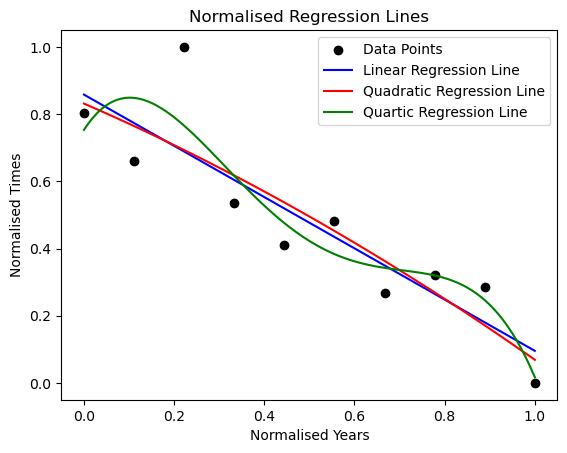

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare Data
year = np.array([1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008])
time = np.array([10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85, 9.69])

# Normalization
def normalize(X):
    X_min = X.min()
    X_max = X.max()
    return (X - X_min) / (X_max - X_min)

def original(X, initial_X):
    X_min = initial_X.min()
    X_max = initial_X.max()
    return X * (X_max - X_min) + X_min

# Normalize data
x = normalize(year)
y = normalize(time)

coefficients_1 = np.polyfit(x, y, 1)
w1_1, w0_1 = coefficients_1
coefficients_2 = np.polyfit(x, y, 2)
w2_2, w1_2, w0_2 = coefficients_2
coefficients_4 = np.polyfit(x, y, 4)
w4_4, w3_4, w2_4, w1_4, w0_4 = coefficients_4

# Generate values for plotting the regression line
x_fit_1 = np.linspace(min(x), max(x), 100)
y_fit_1 = w0_1 + w1_1 * x_fit_1
x_fit_2 = np.linspace(min(x), max(x), 100)
y_fit_2 = w0_2 + w1_2 * x_fit_2 + w2_2 * x_fit_2**2
x_fit_4 = np.linspace(min(x), max(x), 100)
y_fit_4 = w0_4 + w1_4 * x_fit_4 + w2_4 * x_fit_4**2 + w3_4 * x_fit_4**3 + w4_4 * x_fit_4**4 

# Plotting
plt.scatter(x, y, color='black', label='Data Points')

plt.plot(x_fit_1, y_fit_1, color='blue', label='Linear Regression Line')
plt.plot(x_fit_2, y_fit_2, color='red', label='Quadratic Regression Line')
plt.plot(x_fit_4, y_fit_4, color='green', label='Quartic Regression Line')

plt.xlabel('Normalised Years')
plt.ylabel('Normalised Times')
plt.title('Normalised Regression Lines')
plt.legend()

plt.show()

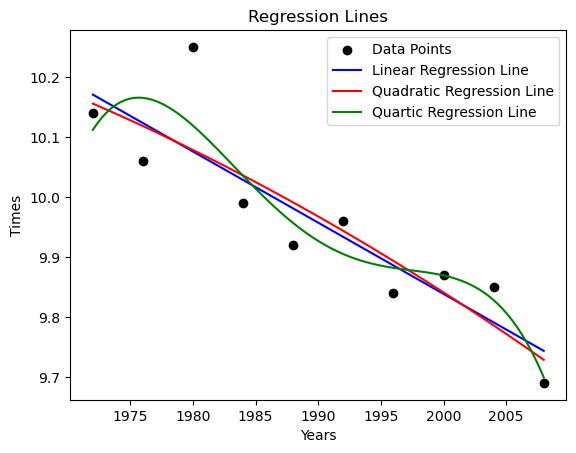

In [2]:
# Original data
X = original(x, year) 
Y = original(y, time)

Coefficients_1 = np.polyfit(X, Y, 1)
W1_1, W0_1 = Coefficients_1
Coefficients_2 = np.polyfit(X, Y, 2)
W2_2, W1_2, W0_2 = Coefficients_2
Coefficients_4 = np.polyfit(X, Y, 4)
W4_4, W3_4, W2_4, W1_4, W0_4 = Coefficients_4

# Generate values for plotting the regression line
X_fit_1 = np.linspace(min(X), max(X), 100)
Y_fit_1 = W0_1 + W1_1 * X_fit_1
X_fit_2 = np.linspace(min(X), max(X), 100)
Y_fit_2 = W0_2 + W1_2 * X_fit_2 + W2_2 * X_fit_2**2
X_fit_4 = np.linspace(min(X), max(X), 100)
Y_fit_4 = W0_4 + W1_4 * X_fit_4 + W2_4 * X_fit_4**2 + W3_4 * X_fit_4**3 + W4_4 * X_fit_4**4 

# Plotting
plt.scatter(X, Y, color='black', label='Data Points')

plt.plot(X_fit_1, Y_fit_1, color='blue', label='Linear Regression Line')
plt.plot(X_fit_2, Y_fit_2, color='red', label='Quadratic Regression Line')
plt.plot(X_fit_4, Y_fit_4, color='green', label='Quartic Regression Line')

plt.xlabel('Years')
plt.ylabel('Times')
plt.title('Regression Lines')
plt.legend()

plt.show()

In [7]:
from sklearn.metrics import mean_squared_error

def loocv_1(x, y, coefficients):
    n = len(x)
    mse_list= []
    
    for i in range(n):
        # Leave-one-out split
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)
        x_test = x[i]
        y_test = y[i]
        
        # Fit the model on the training data
        w1, w0 = np.polyfit(x_train, y_train, 1)
        
        # Predict on the test data
        y_pred = w0 + w1 * x_test
        
        # Calculate mean squared error for this fold
        mse = mean_squared_error([y_test], [y_pred])
        mse_list.append(mse)
    
    return np.mean(mse_list)

def loocv_2(x, y, coefficients):
    n = len(x)
    mse_list= []
    
    for i in range(n):
        # Leave-one-out split
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)
        x_test = x[i]
        y_test = y[i]
        
        # Fit the model on the training data
        w2, w1, w0 = np.polyfit(x_train, y_train, 2)
        
        # Predict on the test data
        y_pred = w0 + w1 * x_test + w2 * x_test**2
        
        # Calculate mean squared error for this fold
        mse = mean_squared_error([y_test], [y_pred])
        mse_list.append(mse)
    
    return np.mean(mse_list)

def loocv_4(x, y, coefficients):
    n = len(x)
    mse_list= []
    
    for i in range(n):
        # Leave-one-out split
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)
        x_test = x[i]
        y_test = y[i]
        
        # Fit the model on the training data
        w4, w3, w2, w1, w0 = np.polyfit(x_train, y_train, 4)
        
        # Predict on the test data
        y_pred = w0 + w1 * x_test + w2 * x_test**2 + w3 * x_test**3 + w4 * x_test**4
        
        # Calculate mean squared error for this fold
        mse = mean_squared_error([y_test], [y_pred])
        mse_list.append(mse)
    
    return np.mean(mse_list)

# Perform LOOCV
mse_loocv_1_N = loocv_1(x, y, coefficients_1)
mse_loocv_1 = loocv_1(X, Y, coefficients_1)
print(f"LOOCV Mean Squared Error for Linear (normalised): {mse_loocv_1_N:.4f}")
print(f"LOOCV Mean Squared Error for Linear: {mse_loocv_1:.4f}")
mse_loocv_2_N = loocv_2(x, y, coefficients_2)
mse_loocv_2 = loocv_2(X, Y, coefficients_2)
print(f"LOOCV Mean Squared Error for Quadratic (normalised): {mse_loocv_2_N:.4f}")
print(f"LOOCV Mean Squared Error for Quadratic: {mse_loocv_2:.4f}")
mse_loocv_4_N = loocv_4(x, y, coefficients_4)
mse_loocv_4 = loocv_4(X, Y, coefficients_4)
print(f"LOOCV Mean Squared Error for Quartic (normalised): {mse_loocv_4_N:.4f}")
print(f"LOOCV Mean Squared Error for Quartic: {mse_loocv_4:.4f}")

LOOCV Mean Squared Error for Linear (normalised): 0.0250
LOOCV Mean Squared Error for Linear: 0.0078
LOOCV Mean Squared Error for Quadratic (normalised): 0.0281
LOOCV Mean Squared Error for Quadratic: 0.0088
LOOCV Mean Squared Error for Quartic (normalised): 0.1073
LOOCV Mean Squared Error for Quartic: 0.0336
